<a href="https://colab.research.google.com/github/MeeTK26/30DaysOfMLDL/blob/main/BankNoteauthenticationANN(day16).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import numpy as np
import pandas as pd

In [18]:
df=pd.read_csv('data_banknote_authentication.csv')
df.head()

,3.6216,8.6661,-2.8073,-0.44699,0
0,4.54590,8.1674,-2.4586,-1.46210,0
1,3.86600,-2.6383,1.9242,0.10645,0
2,3.45660,9.5228,-4.0112,-3.59440,0
3,0.32924,-4.4552,4.5718,-0.98880,0
4,4.36840,9.6718,-3.9606,-3.16250,0


In [19]:
X = df.iloc[:, :-1].values
Y = df.iloc[:, -1].values

In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [22]:
from tensorflow.keras import utils

Y_train = utils.to_categorical(Y_train, num_classes=2)
Y_test = utils.to_categorical(Y_test, num_classes=2)

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model=Sequential([
    Dense(64, activation='relu',input_shape=(4,)),
    Dense(32,activation='relu'),
    Dense(2,activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [25]:
history=model.fit(X_train,Y_train,epochs=10,validation_data=(X_test, Y_test), batch_size=16)

Epoch 1/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.8234 - loss: 0.4772 - val_accuracy: 0.9600 - val_loss: 0.1652
Epoch 2/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9633 - loss: 0.1363 - val_accuracy: 0.9782 - val_loss: 0.0610
Epoch 3/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9837 - loss: 0.0581 - val_accuracy: 0.9891 - val_loss: 0.0356
Epoch 4/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9949 - loss: 0.0254 - val_accuracy: 0.9927 - val_loss: 0.0235
Epoch 5/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9937 - loss: 0.0243 - val_accuracy: 0.9927 - val_loss: 0.0181
Epoch 6/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9970 - loss: 0.0107 - val_accuracy: 1.0000 - val_loss: 0.0122
Epoch 7/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 1.0000 - loss: 0.0093 - val_accuracy: 1.0000 - val_loss: 0.0092
Epoch 8/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0059 - val_accuracy: 1.0000 - val_loss

In [27]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = np.argmax(model.predict(X_test), axis=1)
y_true = np.argmax(Y_test, axis=1)
print(classification_report(y_true, y_pred))

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       160
           1       1.00      1.00      1.00       115

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



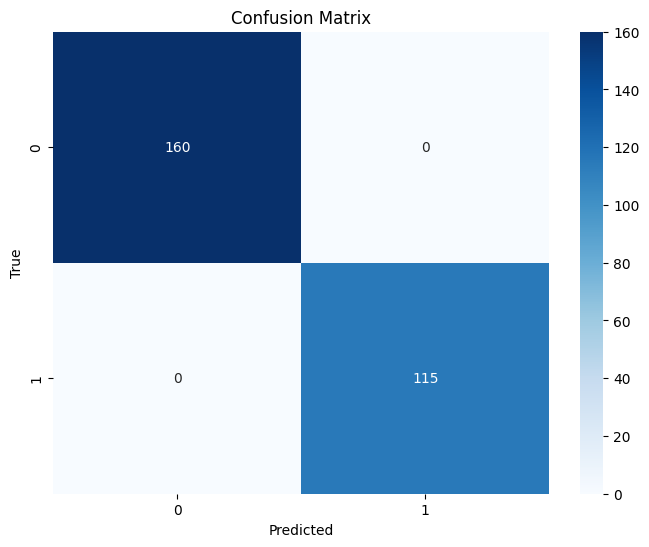

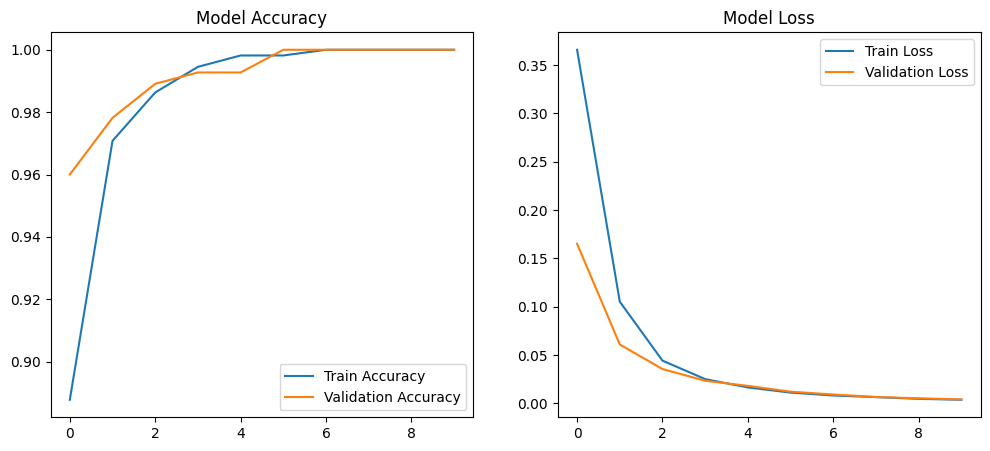

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Model Accuracy")

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Model Loss")
plt.show()

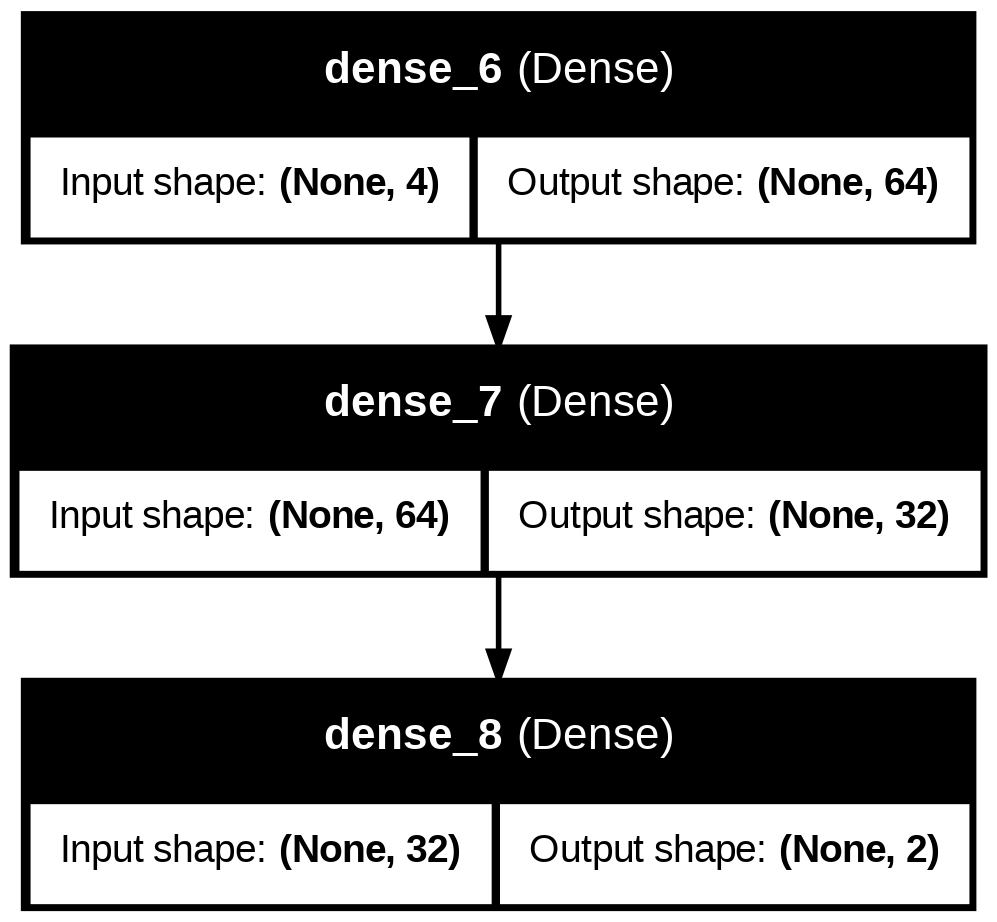

In [30]:
import tensorflow as tf

tf.keras.utils.plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

from IPython.display import Image
Image("model_plot.png")